In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\adhil\OneDrive\Pictures\wine.csv")

In [3]:
# Print the first few rows of the dataset
print(df.head())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


<Axes: >

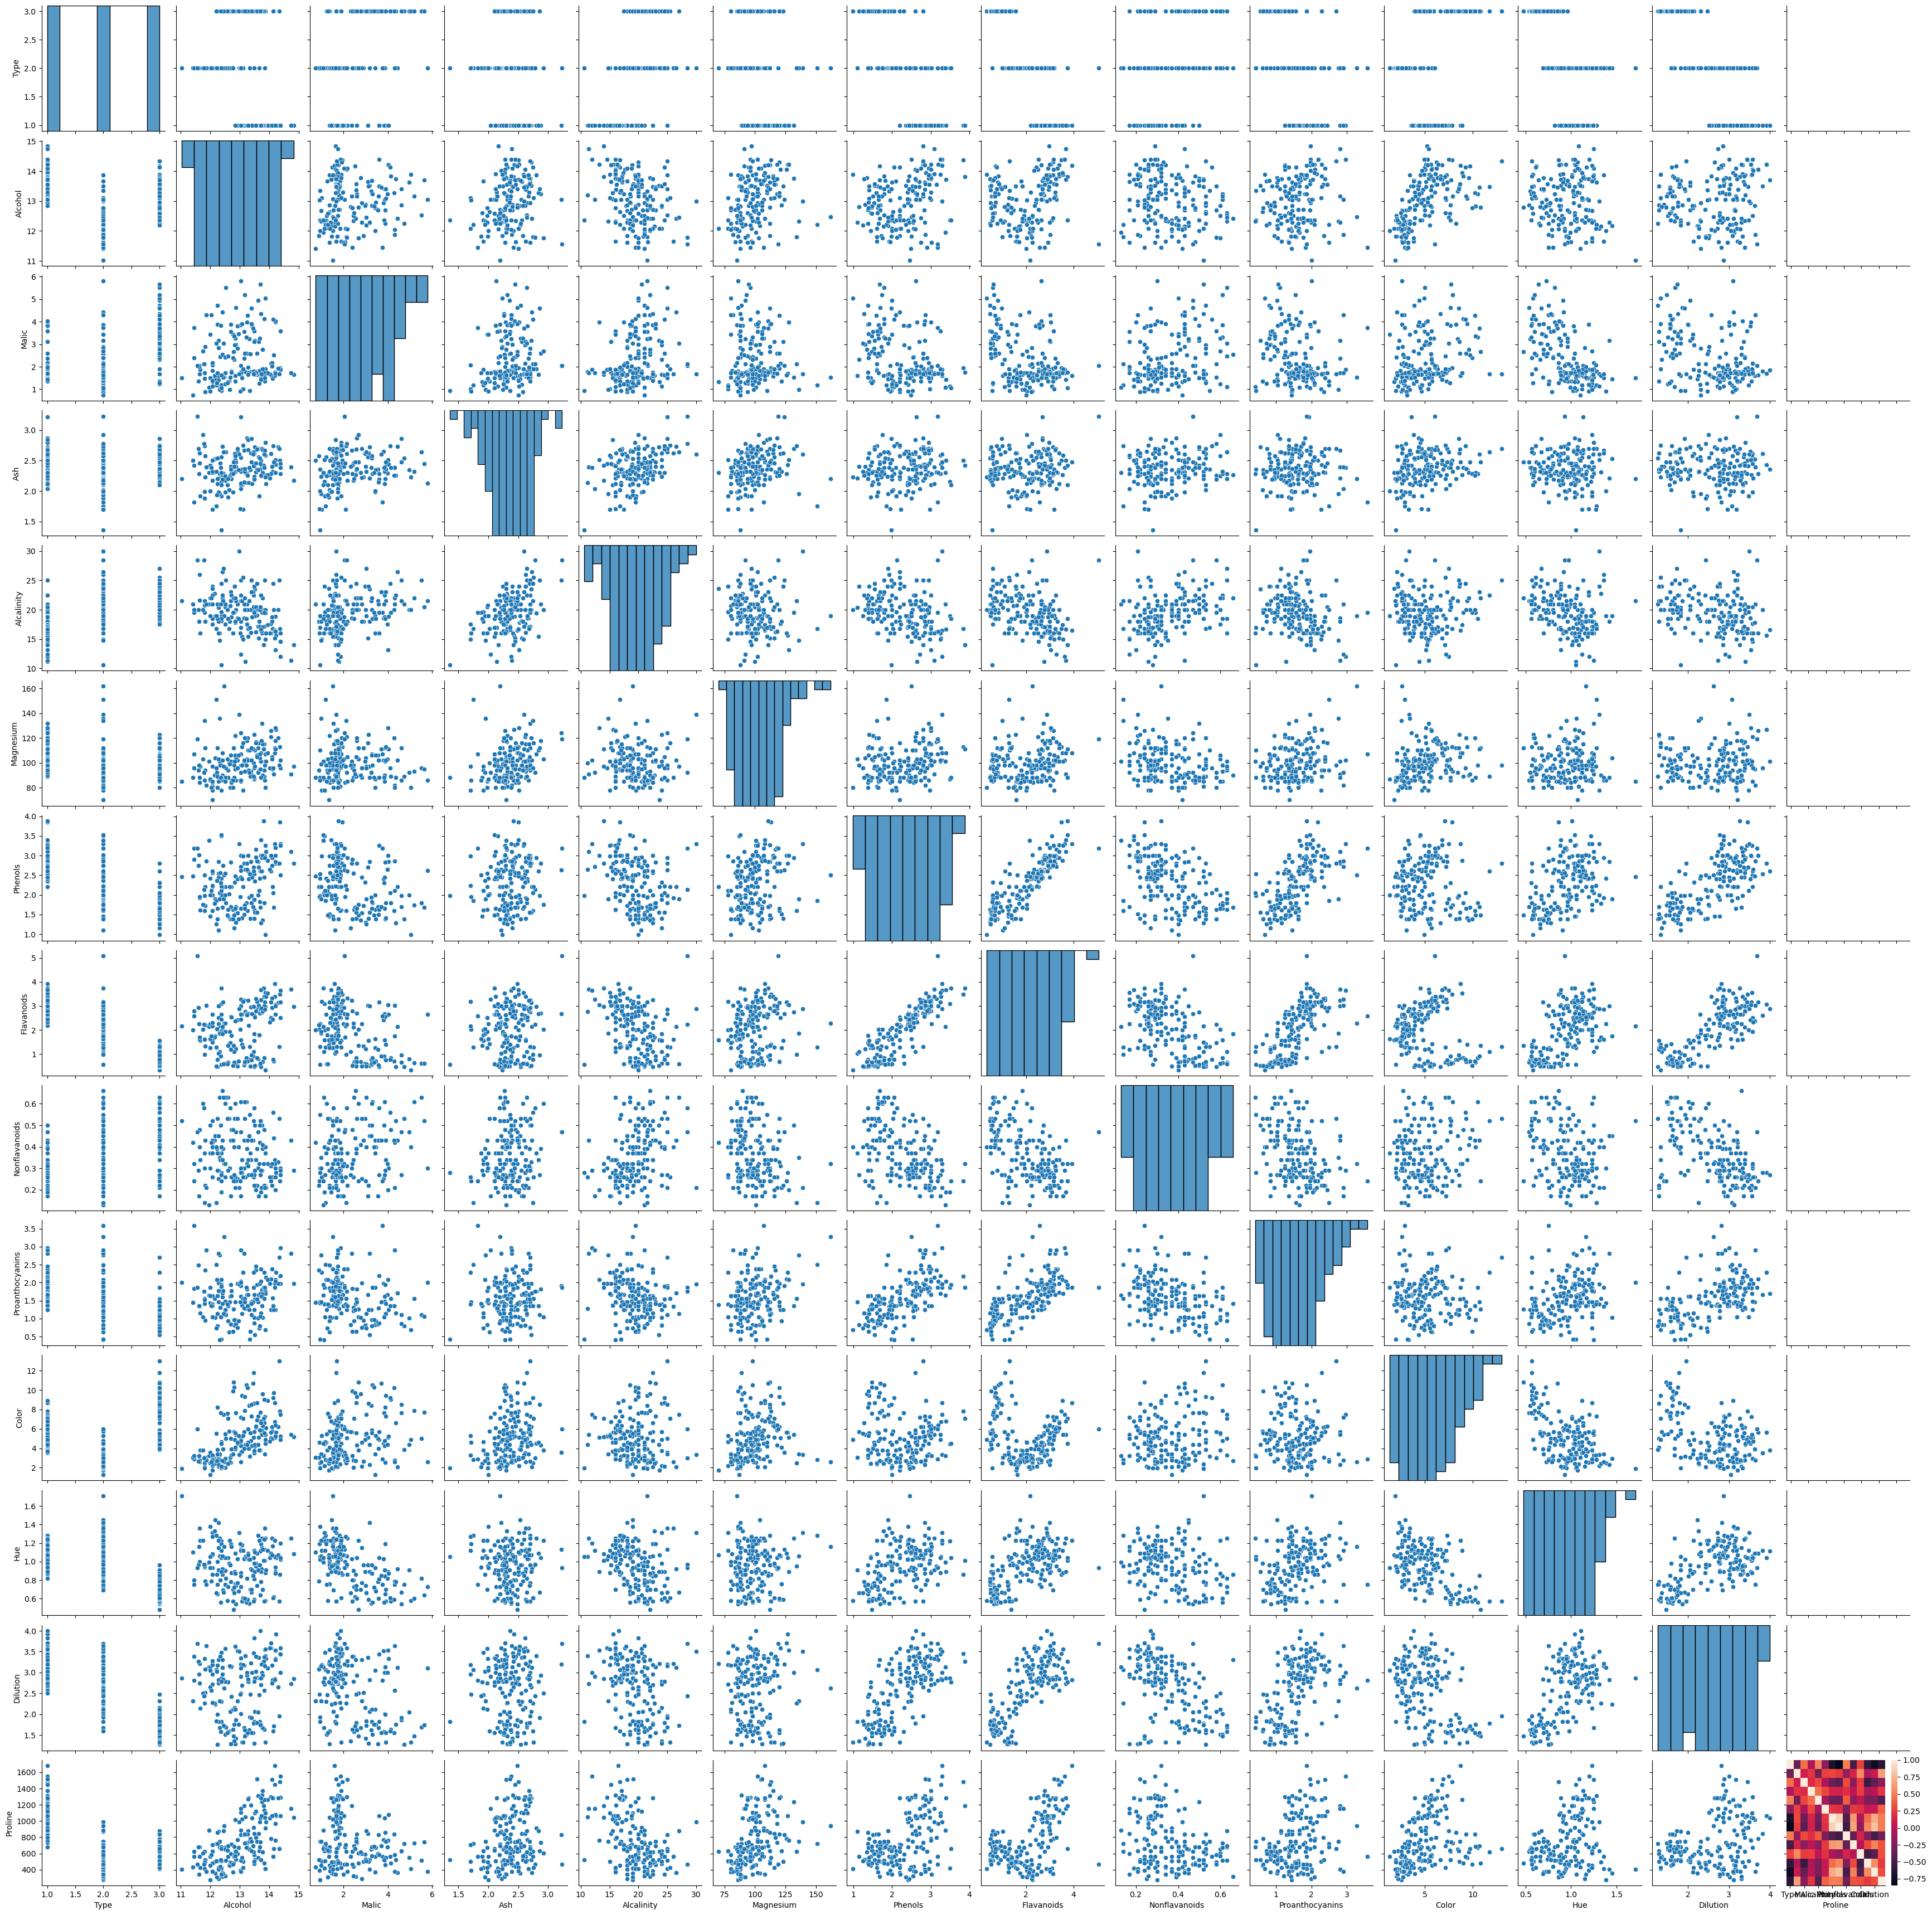

In [4]:
# Task 1: EDA
df.describe()
sns.pairplot(df)
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [9]:
# Task 2: PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA(n_components=0.95)  # Choose optimal number of components
df_pca = pca.fit_transform(df_scaled)

In [8]:
print("Shape of original dataset:", df.shape)
print("Shape of dataset after PCA:", df_pca.shape)

print("Number of principal components:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of original dataset: (178, 14)
Shape of dataset after PCA: (178, 10)
Number of principal components: 10
Explained variance ratio: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615]


In [11]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Task 3: Clustering with original data
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

labels = kmeans.labels_
silhouette = silhouette_score(df, labels)
db_index = davies_bouldin_score(df, labels)

print("Silhouette score:", silhouette)
print("Davies-Bouldin index:", db_index)

Silhouette score: 0.5238994931142807
Davies-Bouldin index: 0.5174645579561422


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Task 4: Clustering with PCA data
kmeans_pca = KMeans(n_clusters=5)
kmeans_pca.fit(df_pca)
labels_pca = kmeans_pca.labels_
silhouette_pca = silhouette_score(df_pca, labels_pca)
db_index_pca = davies_bouldin_score(df_pca, labels_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Task 4: Clustering with PCA data
kmeans_pca = KMeans(n_clusters=5)
kmeans_pca.fit(df_pca)

labels_pca = kmeans_pca.labels_
silhouette_pca = silhouette_score(df_pca, labels_pca)
db_index_pca = davies_bouldin_score(df_pca, labels_pca)

print("Silhouette score (PCA):", silhouette_pca)
print("Davies-Bouldin index (PCA):", db_index_pca)

Silhouette score (PCA): 0.22336741097261228
Davies-Bouldin index (PCA): 1.8076004126091114


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# Task 5: Comparison and analysis
print("Original data:")
print(f"Silhouette score: {silhouette}")
print(f"Davies-Bouldin index: {db_index}")
print("PCA data:")
print(f"Silhouette score: {silhouette_pca}")
print(f"Davies-Bouldin index: {db_index_pca}")

Original data:
Silhouette score: 0.5238994931142807
Davies-Bouldin index: 0.5174645579561422
PCA data:
Silhouette score: 0.22336741097261228
Davies-Bouldin index: 1.8076004126091114
